In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv("/Users/zensadler/Downloads/background_noise_focus_dataset.csv")

In [13]:
print(df.head())
print(df.info())
print(df.describe())

   participant_id  age           role task_type background_noise_type  \
0               1   44        Student   Writing         Traffic Noise   
1               2   30        Student   Writing               Silence   
2               3   23  Remote Worker   Reading               Silence   
3               4   36   Professional   Writing     Songs with Lyrics   
4               5   34  Remote Worker  Studying         Traffic Noise   

   noise_volume_level  focus_duration_minutes  perceived_focus_score  \
0                   8                      98                      5   
1                   9                      31                      3   
2                   4                      39                      9   
3                   1                      93                      4   
4                   1                      94                      6   

   task_completion_quality  mental_fatigue_after_task  
0                        5                          1  
1               

In [14]:
df = df.drop_duplicates()

In [15]:
print(df.isnull().sum())

participant_id               0
age                          0
role                         0
task_type                    0
background_noise_type        0
noise_volume_level           0
focus_duration_minutes       0
perceived_focus_score        0
task_completion_quality      0
mental_fatigue_after_task    0
dtype: int64


In [19]:
df = df.dropna(subset=[
    "noise_volume_level",
    "focus_duration_minutes",
    "perceived_focus_score",
    "task_completion_quality",
])

In [20]:
numeric_cols = [
    "noise_volume_level",
    "focus_duration_minutes",
    "perceived_focus_score",
    "task_completion_quality",
    "mental_fatigue_after_task"
]


In [22]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna()

print("Cleaned shape:", df.shape)

Cleaned shape: (500, 10)


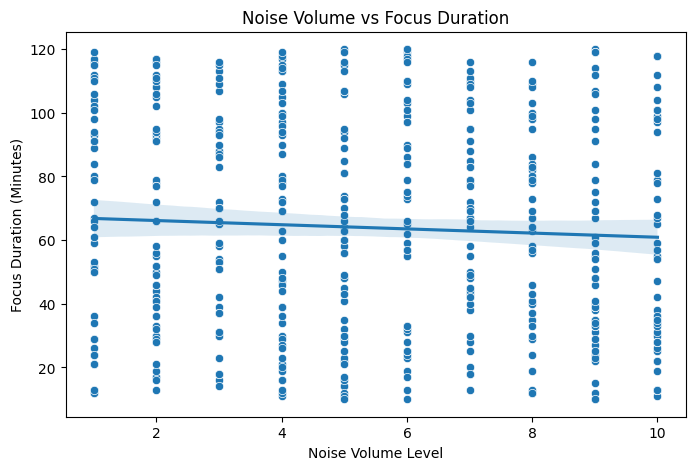

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="noise_volume_level", y="focus_duration_minutes", data=df)
sns.regplot(x="noise_volume_level", y="focus_duration_minutes", data=df, scatter=False)
plt.title("Noise Volume vs Focus Duration")
plt.xlabel("Noise Volume Level")
plt.ylabel("Focus Duration (Minutes)")
plt.show()

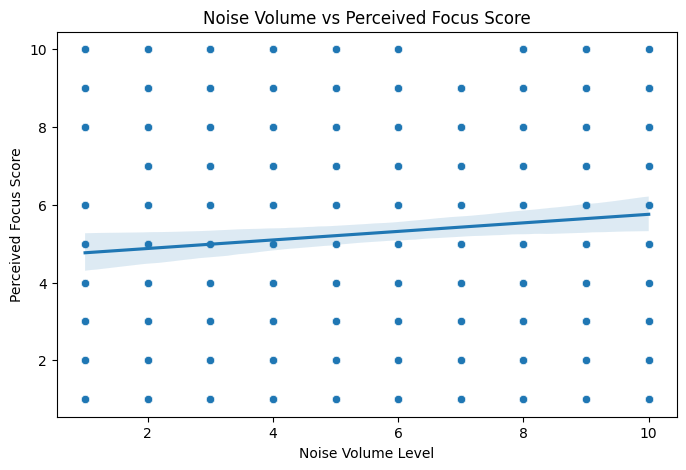

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="noise_volume_level", y="perceived_focus_score", data=df)
sns.regplot(x="noise_volume_level", y="perceived_focus_score", data=df, scatter=False)
plt.title("Noise Volume vs Perceived Focus Score")
plt.xlabel("Noise Volume Level")
plt.ylabel("Perceived Focus Score")
plt.show()

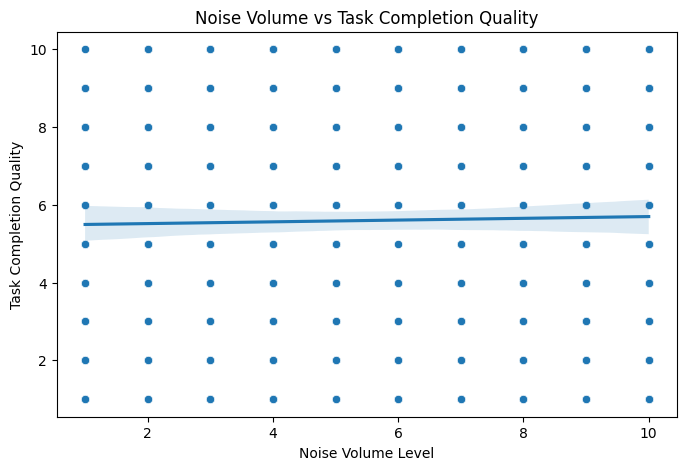

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="noise_volume_level", y="task_completion_quality", data=df)
sns.regplot(x="noise_volume_level", y="task_completion_quality", data=df, scatter=False)
plt.title("Noise Volume vs Task Completion Quality")
plt.xlabel("Noise Volume Level")
plt.ylabel("Task Completion Quality")
plt.show()

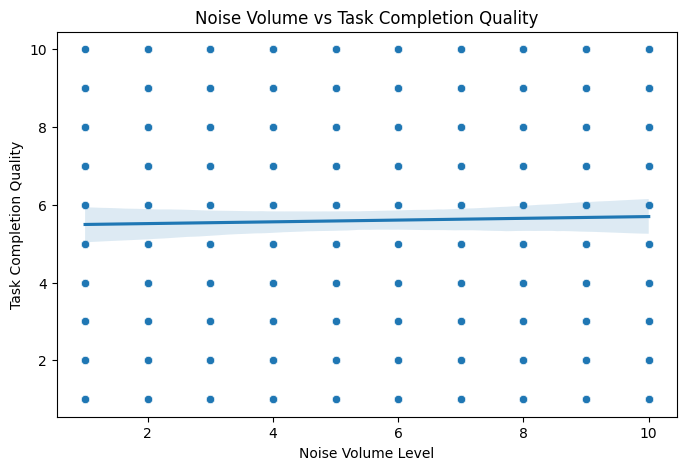

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="noise_volume_level", y="task_completion_quality", data=df)
sns.regplot(x="noise_volume_level", y="task_completion_quality", data=df, scatter=False)
plt.title("Noise Volume vs Task Completion Quality")
plt.xlabel("Noise Volume Level")
plt.ylabel("Task Completion Quality")
plt.show()

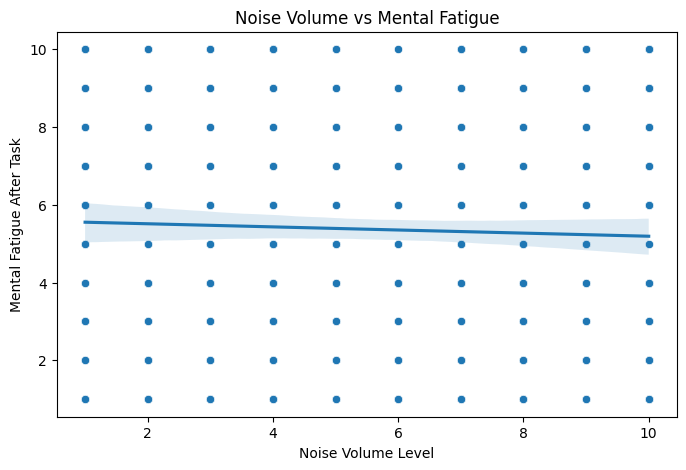

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="noise_volume_level", y="mental_fatigue_after_task", data=df)
sns.regplot(x="noise_volume_level", y="mental_fatigue_after_task", data=df, scatter=False)
plt.title("Noise Volume vs Mental Fatigue")
plt.xlabel("Noise Volume Level")
plt.ylabel("Mental Fatigue After Task")
plt.show()

                           noise_volume_level  focus_duration_minutes  \
noise_volume_level                   1.000000               -0.056669   
focus_duration_minutes              -0.056669                1.000000   
perceived_focus_score                0.111009               -0.015456   
task_completion_quality              0.022769                0.045629   
mental_fatigue_after_task           -0.038148                0.026195   

                           perceived_focus_score  task_completion_quality  \
noise_volume_level                      0.111009                 0.022769   
focus_duration_minutes                 -0.015456                 0.045629   
perceived_focus_score                   1.000000                 0.024061   
task_completion_quality                 0.024061                 1.000000   
mental_fatigue_after_task              -0.059465                 0.048160   

                           mental_fatigue_after_task  
noise_volume_level                         

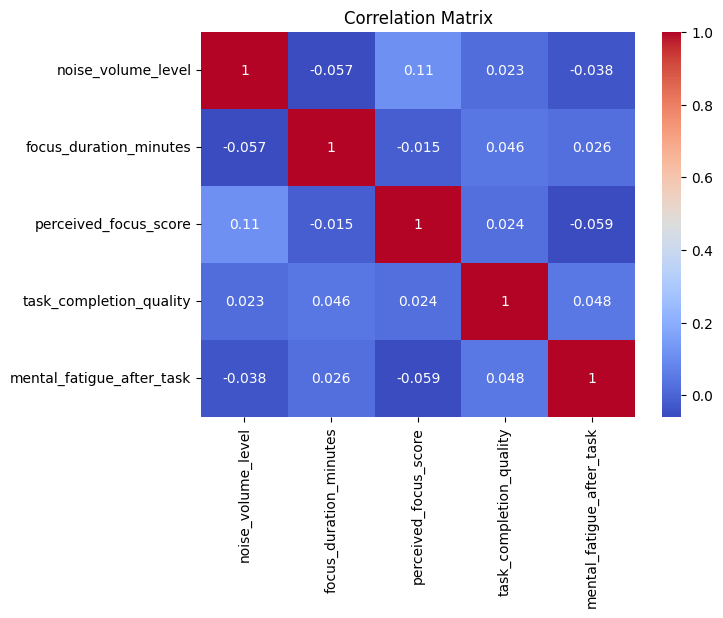

In [28]:
correlation = df[[
    "noise_volume_level",
    "focus_duration_minutes",
    "perceived_focus_score",
    "task_completion_quality",
    "mental_fatigue_after_task"
]].corr()

print(correlation)

plt.figure(figsize=(7,5))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()